<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/NB4-09%20Biomedical%20Imaging%20and%20Pytorch_(IV).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biomedical Imaging and Pytorch IV:
# Data Augmentation and Early Stopping

>**Goal**: Let's try to create a NB where we use data augmentation and early stopping when i.e., we reach a model that does not improve for a certain number of epochs. We will use a skin lesion dataset similar to the previous one but with 7 classes.

## 1. **Introduction**


**``Data Augmentation and Early Stopping``** are two crucial techniques in machine learning and deep learning that help _`improve the performance and generalization of models`_. Here’s an explanation of their importance:



### A. **Data Augmentation**

**`Definition`**: Data augmentation involves _`creating new training examples from the existing data by applying random transformations such as rotation, translation, flipping, scaling, noise addition, and more`_.

**`Importance`**:
- **`Enhances Model Generalization`**: By introducing variability in the training data, _`data augmentation helps the model generalize better to unseen data`_. This reduces overfitting, where the model performs well on the training data but poorly on new data.
  
- **`Improves Performance on Small Datasets`**: When there is limited data, data augmentation effectively _`increases the size of the training dataset`_, giving the model more diverse examples to learn from.

- **`Increases Model Robustness`**: Augmented data often _`simulates real-world variations and distortions`_, making the model more robust to such scenarios during inference.

- **`Supports Balanced Learning`**: In cases of imbalanced datasets (where some classes have significantly fewer examples), _`data augmentation can help balance the dataset by generating more examples of the minority classes`_.

**`Example`**: In image classification, _`rotating an image slightly or flipping it horizontally creates a new training example. The model learns to recognize the object regardless of its orientation, making it more versatile`_.


### B. **Early Stopping**

**`Definition`**: Early stopping is a regularization technique where the _`training of a model is halted when the performance on a validation dataset stops improving or begins to degrade`_.

**`Importance`**:
- **`Prevents Overfitting`**: As training progresses, _`a model might start to memorize the training data, leading to overfitting. Early stopping detects when this occurs`_ by monitoring the validation loss or accuracy and stops training before the model overfits.

- **`Saves Computational Resources`**: Training deep models can be computationally expensive. _`Early stopping can prevent unnecessary training epochs once optimal performance is reached`_, saving time and resources.

- **`Optimizes Model Performance`**: By stopping at the point where the model performs best on the validation data, _`early stopping ensures that the model is as generalized as possible without compromising on performance`_.

- **`Reduces the Need for Manual Tuning`**: Finding the right number of training epochs manually can be challenging. _`Early stopping automates this process by dynamically determining the best point to stop training`_.

**`Example`**: Suppose you're training a neural network and notice that the _`validation loss starts increasing after 50 epochs, while the training loss continues to decrease. Early stopping would halt the training process at this point`_, preventing the model from overfitting to the training data.



### Links for Further Reading:
- [Data Augmentation in Machine Learning](https://towardsdatascience.com/data-augmentation-in-machine-learning-1fce72d384c3)
- [Understanding Early Stopping in Deep Learning](https://machinelearningmastery.com/early-stopping-to-avoid-overtraining-neural-network-models/)
- [The Power of Data Augmentation](https://www.analyticsvidhya.com/blog/2021/06/guide-to-image-data-augmentation-in-deep-learning/)

These techniques are essential for building robust, efficient, and generalizable machine learning models.


LET'S GET STARTED!!!!

## 2. **Setting up Our Workspace**



First, we check if GPU is connected. The `nvidia-smi` command (NVIDIA System Management Interface) is used to monitor and manage NVIDIA GPUs (Graphics Processing Units) in a system. It provides detailed information about the status and performance of the GPUs, including GPU utilization, temperature, memory usage, processes utilizing the GPU, and more.

**[`nvidia-smi`](https://www.baeldung.com/linux/nvidia-smi-full-gpu-details)** is a command-line utility provided by NVIDIA that helps you manage and monitor NVIDIA GPU devices. It stands for NVIDIA System Management Interface.



---
**Display Basic GPU Information**

---

In [1]:
!nvidia-smi

Wed Oct  2 13:37:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Setting our workspace: `/content` and `/content/datasets`



---
**Setting our Home**

---



We save the root directory of the project '/content' as 'HOME' since we will be navigating through the directory to have multiple projects under the same HOME. Additionally, we will have the datasets in the 'datasets' directory, so all datasets are easily accessible for any project.

In [2]:
# Setting our $HOME to /content

import os
HOME = os.getcwd()
print(HOME)

/content



---
**Mount Google Drive**

---

Next, it imports the drive module from the google.colab library, which provides functionalities for mounting Google Drive in Google Colab.

Additionally, Google Drive is mounted in Google Colab and made available at the path /content/drive. The user will be prompted to authorize access to Google Drive. Once authorized, the content of Google Drive will be accessible from that point onwards in the Colab notebook.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Load a Dataset (Dataloader)



---
**Create a directory where we can save our dataset**

---


Create the dataset directory (if it doesn't exist), where we are going to save the dataset with which we are going to train our CNN.


In [4]:
# Create the dataset directory
import os
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
print(os.getcwd())

/content



---
**Change to new directory datasets**

---

In [5]:
%%time

# Change to new datasets folder
os.chdir(datasets_dir)
print('dataset_dir =', os.getcwd())
if  not os.path.isfile('exp4val.zip'):
  #!wget -q https://www.dropbox.com/s/nzrvuoos7sgl5dh/exp4val.zip
  !wget -q 'https://www.dropbox.com/scl/fi/jlto56qow8jtxwdu0rhz1/exp4val.zip?rlkey=esvwkx9k92u9zfcpo6x9dqh0l&st=rveoe57l&dl=0' -O exp4val.zip
  !unzip -qq -o exp4val.zip

dataset_dir = /content/datasets
CPU times: user 34 ms, sys: 5.91 ms, total: 39.9 ms
Wall time: 3.82 s


### Inspect the Dataset: Skin Lesion Detection in 7 Classes




The dataset contains several thousand photos of cell images in seven subdirectories (classes) with one cell image per class. The directory structure is as follows thanks to this snipet:



*  0: 'akiec' - [actinic keratosis](https://www.hopkinsmedicine.org/health/conditions-and-diseases/actinic-keratosis)

*  1: 'bcc' - [basal cell carcinoma](https://www.skincancer.org/skin-cancer-information/basal-cell-carcinoma/)

*  2: 'bkl' - [benign keratosis](https://dermnetnz.org/topics/seborrhoeic-keratosis)

*  3: 'df' - [dermatofibroma](https://www.archbronconeumol.org/en-dermatofibroma-metastasis-pulmonares-tratamiento-actual-articulo-S0300289609001549)

*  4: 'mel' - [melanoma](https://medlineplus.gov/spanish/ency/article/000850.htm)

*  5: 'nv' - [melanocytic nevus](https://en.wikipedia.org/wiki/Melanocytic_nevus)

*  6: 'vasc' - [vascular lesion](https://www.yalemedicine.org/clinical-keywords/vascular-lesions)



---
**Display the datapath structure.**

---

In [6]:
import os

def print_directory_tree(root_dir, level=0):
    """
    Recursively prints the directory tree structure, only listing directories.
    """
    prefix = " " * (level * 4) + "|-- " if level > 0 else ""
    print(prefix + os.path.basename(root_dir))

    if os.path.isdir(root_dir):
        for item in os.listdir(root_dir):
            item_path = os.path.join(root_dir, item)
            if os.path.isdir(item_path):
                print_directory_tree(item_path, level + 1)

# Define the data directory
data_dir = datasets_dir

# Print the directory tree
print_directory_tree(data_dir)

datasets
    |-- val
        |-- class_2
        |-- class_5
        |-- class_6
        |-- class_3
        |-- class_4
        |-- class_0
        |-- class_1
    |-- test
        |-- class_2
        |-- class_5
        |-- class_6
        |-- class_3
        |-- class_4
        |-- class_0
        |-- class_1
    |-- train
        |-- class_2
        |-- class_5
        |-- class_6
        |-- class_3
        |-- class_4
        |-- class_0
        |-- class_1


In [7]:
!apt-get install -q tree

!tree -L 2 -d $datasets_dir

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (81.3 kB/s)
Selecting previously unselected package tree.
(Reading database ... 123614 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
/content/datasets
├── test
│   ├── class_0
│   ├── class_1
│   ├── class_2
│   ├── class_3
│   ├── class_4
│   ├── class_5
│   └── class_6
├── train
│   ├── class_0
│   ├── class_1
│   ├── class_2
│   ├── class_3
│   ├── class_4
│   ├── class_5
│   └── class_6
└── val
    ├── class_0
    ├── class_1
 


---
**Display 8 images from a class from test**

---

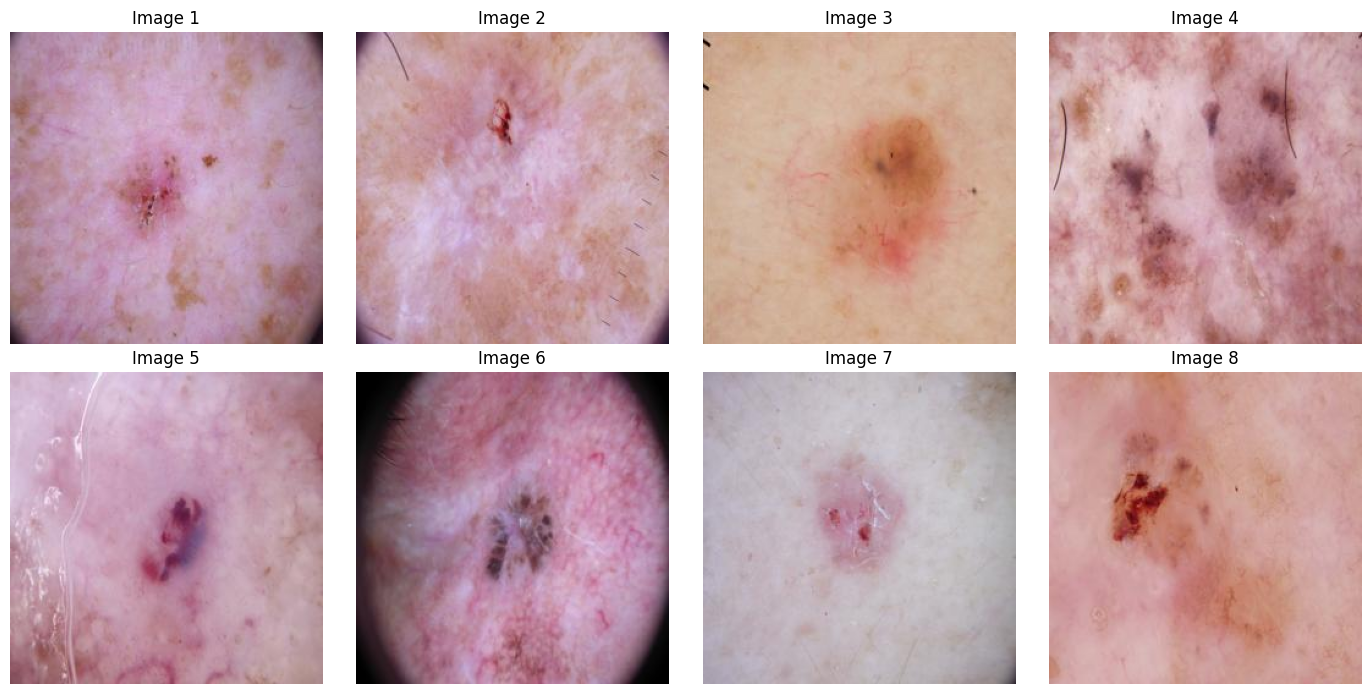


 Size of image:  (256, 256, 3)


In [8]:
# creates a figure with subplots arranged in a 2x4 grid
import matplotlib.pyplot as plt
import glob
import matplotlib.image as mpimg

# Directory of the images
image_directory = f'{HOME}/datasets/test/class_1/'

# List of image paths
image_paths = glob.glob(image_directory + '*.jpg')[:8]

# Set up the figure with subplots
fig, axs = plt.subplots(2, 4, figsize=(14, 7))

# Iterate through the images and display them in the subplots
for i, image_path in enumerate(image_paths):
    row = i // 4
    col = i % 4
    img = mpimg.imread(image_path)
    axs[row, col].imshow(img)
    axs[row, col].set_title(f'Image {i + 1}')
    axs[row, col].axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()
print("\n Size of image: ", img.shape)

### Setting a Dataloader



The purpose of a **DataLoader** is fundamental in the context of machine learning and deep learning, especially when working with large or complex datasets. `Its main purpose is to facilitate the efficient loading and manipulation of data during model training`.



---
**Load Libraries for DataLoader**

---

In [9]:
import torch
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, ConcatDataset


---
**Create a Dataloader for train, val y test sets**

---

In [10]:
%%time

# 1. Calculate the mean and standard deviation on the training set.
# train, validation and test data directory

train_dir = f"{HOME}/datasets/train/"
val_dir  = f"{HOME}/datasets/val/"
test_dir   = f"{HOME}/datasets/test/"

# transform to calculate mean and standard desviation
transform = transforms.Compose([
    transforms.ToTensor()  # transform images to tensor
])

# Load the ImageFolder dataset and apply the transformation
dataset = datasets.ImageFolder(root= train_dir, transform=transform)

# it's better to use a loader to retrieve images (tensors)
loader = DataLoader(dataset, batch_size=1, shuffle=False)

# Initialize variables to store the sum of pixel values and
# standard deviation.
# These variables are set to floating-point zeros to ensure
# accurate calculations.
mean_sum = 0.0
std_sum = 0.0
total_samples = 0

# Iterates over the data loader (loader),
# calculates the mean and standard deviation across all channels
# for each batch(0) and spatial dimensions (height(2) and width(3))
for images, _ in loader:
    mean_sum += torch.mean(images, dim=[0, 2, 3])
    std_sum += torch.std(images, dim=[0, 2, 3])
    total_samples += 1

mean = mean_sum / total_samples
std = std_sum / total_samples

print("Total train samples:", total_samples)
print("Mean:", mean)
print("Std:", std)

Total train samples: 7350
Mean: tensor([0.7536, 0.5706, 0.6018])
Std: tensor([0.0849, 0.1106, 0.1187])
CPU times: user 22.2 s, sys: 510 ms, total: 22.7 s
Wall time: 23.7 s


---
**Transform the dataloaders for data augmentation**

---


- **`Initial Transformations`**: Various augmentation techniques like flipping, cropping, rotating, color jittering, affine transformations, blurring, and perspective changes are defined.  
- **`Enhancing Transformations`**: Each augmentation technique is enhanced by converting images to tensors and normalizing them.  
- **`Final Output`**: The list of transformations is updated and printed.

These transformations are typically applied during the training process to increase the diversity of the training data, helping to improve the generalization of the deep learning model.


In [11]:
%%time

#mean_color = tuple(np.array(to_pil(img)).mean(axis=(0, 1)).astype(int))

# Define the data transformations to be applied
# to each transformed dataset
transformations = [
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(64, padding=4, padding_mode='reflect'),
    transforms.RandomRotation(5, fill=(0, 0, 0)),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    #transforms.RandomAffine(degrees=3, translate=(0.1, 0.1), scale=(0.8, 0.8), fill=(0, 0, 0)),
    transforms.GaussianBlur(kernel_size=3),
    #transforms.RandomPerspective(distortion_scale=1.0, p=1.0, fill=(0, 0, 0)),
    #transforms.RandomErasing(p=0.5, scale=(1.0, 1.0), ratio=(1.0, 1.0), value='random'),
    transforms.RandomResizedCrop(64),
]

# Add the ToTensor() and Normalize() transformation
# to each data transformation
for i in range(len(transformations)):
    transformations[i] = transforms.Compose([
        transformations[i],
        transforms.Resize((64,64)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
    ])

print(transformations)

[Compose(
    RandomHorizontalFlip(p=0.5)
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=tensor([0.7536, 0.5706, 0.6018]), std=tensor([0.0849, 0.1106, 0.1187]))
), Compose(
    RandomCrop(size=(64, 64), padding=4)
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=tensor([0.7536, 0.5706, 0.6018]), std=tensor([0.0849, 0.1106, 0.1187]))
), Compose(
    RandomRotation(degrees=[-5.0, 5.0], interpolation=nearest, expand=False, fill=(0, 0, 0))
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=tensor([0.7536, 0.5706, 0.6018]), std=tensor([0.0849, 0.1106, 0.1187]))
), Compose(
    ColorJitter(brightness=(0.5, 1.5), contrast=(0.5, 1.5), saturation=(0.5, 1.5), hue=None)
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=tensor([0.7536, 0.5

---
**Normalize the dataloaders using Statistics**

---



- **`Normalization`**: Normalization is crucial for ensuring that `pixel values across images are on a similar scale [0 1]`, which helps in stabilizing and speeding up the training process of deep neural networks.  
- **`Dataset Preparation`**: Each dataset (`train_data`, `val_set`, `test_set`) is prepared with consistent transformations and normalization, facilitating uniformity in data processing across training, validation, and testing phases.

This setup ensures that the datasets are properly preprocessed and ready to be used in training and evaluating machine learning models, particularly deep neural networks, using PyTorch.

In [12]:
%%time

# 2. Normalize the training set using these statistics.
train_data = datasets.ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

# 3. Normalize the test and validation set using the same statistics
# calculated on the training set.
val_set = datasets.ImageFolder(val_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

test_set = datasets.ImageFolder(test_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)])
)

print(f"Length of Train Data :{len(train_data)}")
print(f"Length of Validation Data : {len(val_set)}")
print(f"Length of Test Data : {len(test_set)}")

classes = train_data.classes
print('Classes: ', classes)

Length of Train Data :7350
Length of Validation Data : 1050
Length of Test Data : 210
Classes:  ['class_0', 'class_1', 'class_2', 'class_3', 'class_4', 'class_5', 'class_6']
CPU times: user 25.1 ms, sys: 2.06 ms, total: 27.1 ms
Wall time: 30.1 ms


`The train set is unmodified in size because ``transform()`` transform the data but it don't augment the dataset`



---
**Data Augmentation**

---



The train set is modified in size because `ConcatDataset()` augment the dataset.

In [13]:
# Apply each transformation separately to a transformed dataset
# and concatenate them.
train_set = train_data
for transform in transformations:
    transformed_data = datasets.ImageFolder(train_dir,transform = transform)
    train_set = ConcatDataset([train_set, transformed_data])

print(f"Length of Train Data :{len(train_set)}")
print(f"Length of Validation Data : {len(val_set)}")
print(f"Length of Test Data : {len(test_set)}")


Length of Train Data :51450
Length of Validation Data : 1050
Length of Test Data : 210


### Display an image and its transformations

---
**Display an image**

---

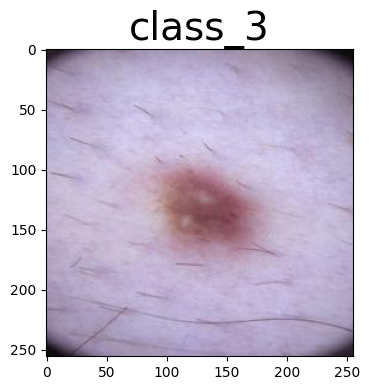

In [14]:
import itertools
import numpy as np
import os
import matplotlib.pyplot as plt
from torchvision import transforms

# Asumiendo que mean y std ya están definidos y que inv_normalize se ha creado

# Define una transformación mínima que sólo convierte a tensor
basic_transform = transforms.Compose([
    transforms.ToTensor()
])

# DataLoader que no aplica las transformaciones complejas, sólo convierte a tensor
basic_dataloader = torch.utils.data.DataLoader(
    datasets.ImageFolder(train_dir, transform=basic_transform),
    batch_size=32,
    shuffle=True
)

# Obtener filas y columnas para la figura
nrows, ncols = 1, 1  # Solo una imagen

# Configurar la figura
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4), subplot_kw={'facecolor': "#ebf5ff"})

# Obtener un índice aleatorio
rb_index = np.random.randint(0, len(basic_dataloader))

# Obtener el batch correspondiente al índice aleatorio
imgs, labels = next(itertools.islice(basic_dataloader, rb_index, rb_index + 1))

# Mostrar la imagen y su etiqueta
#ax.set_xticks([])
#ax.set_yticks([])
ax.set_title(classes[labels[0]], fontsize=28)
ax.imshow(imgs[0].permute(1, 2, 0))
fig.tight_layout()
plt.show()


---
**Display its transforms**

---

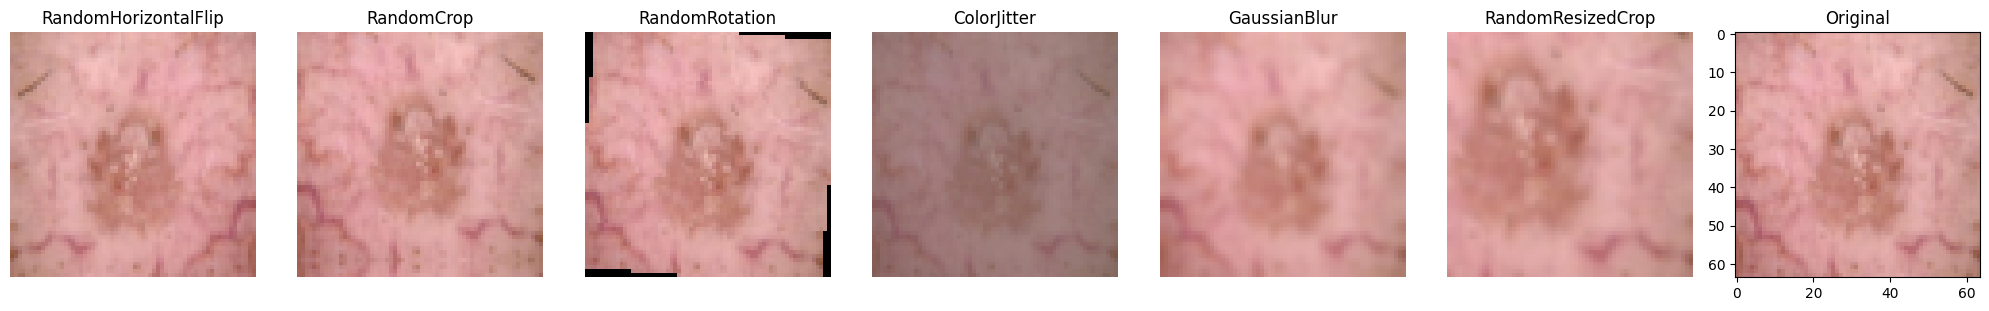

In [15]:
from torchvision.transforms import ToPILImage
import random

# Convert the tensor image to PIL to visualise the transformations.
to_pil = ToPILImage()

# Create a denormalisation transformation
inv_normalize = transforms.Normalize(
    mean=[-m/s for m, s in zip(mean, std)],
    std=[1/s for s in std]
)

img = next(img for img,label in train_set)

# Set up the figure with subplots (length of transformations + original)
fig, axs = plt.subplots(1, len(transformations)+1, figsize=(20, 5))

for i, transform in enumerate(transformations):
    # Convert tensor to PIL, then apply the transform
    # The image needs to be denormalized before transforming
    # because the transform may re-normalize
    transformed_image = transform(to_pil(inv_normalize(img)))

    # Show the transformed image
    axs[i].imshow(inv_normalize(transformed_image).permute(1, 2, 0))
    # Show the name of the transformation
    axs[i].set_title(type(transform.transforms[0]).__name__)
    axs[i].axis('off')
axs[i+1].set_title('Original')
axs[i+1].imshow(inv_normalize(img).permute(1, 2, 0))

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

### Displaying all classes

Let us show one example for each class, for fun. As we've transformed the image by normalizing it, we should undo the transformation before visualizing the image.

---
**Display one example from each class**

---


CPU times: user 28.4 s, sys: 681 ms, total: 29 s
Wall time: 29.1 s


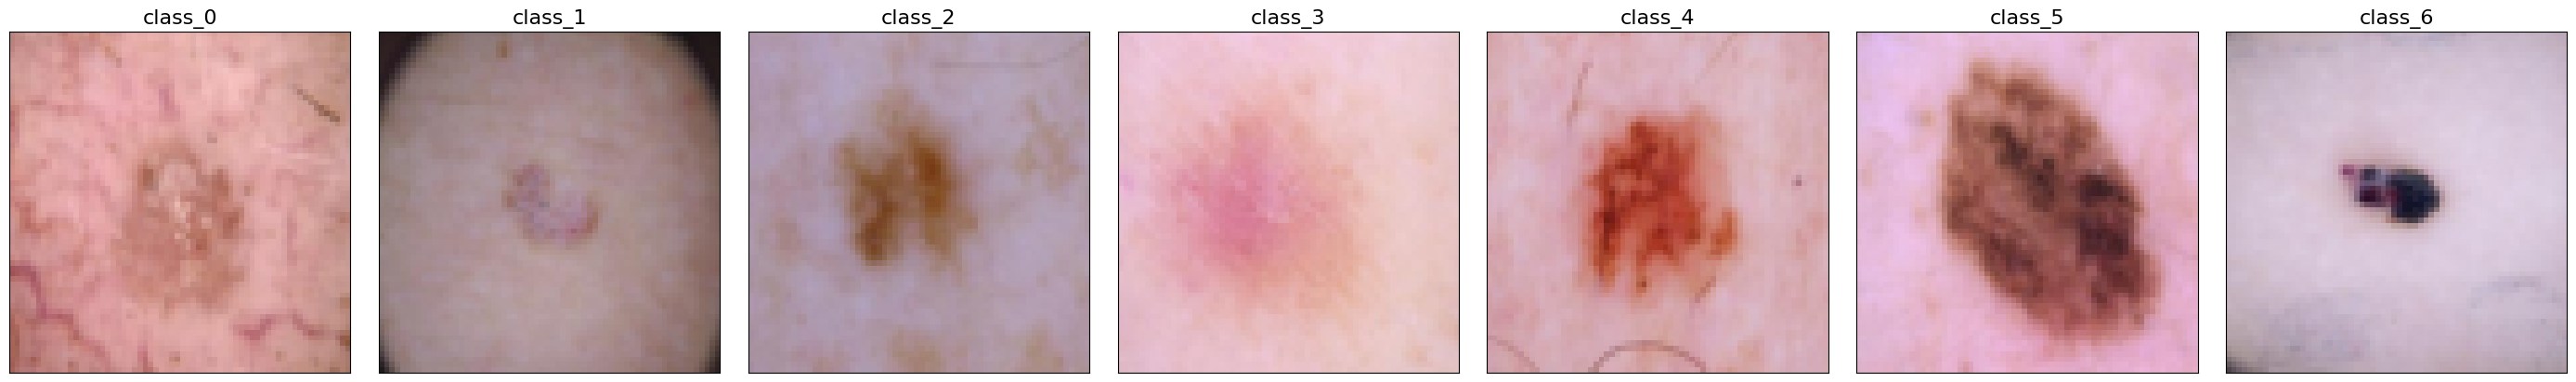

In [16]:
%%time
inv_normalize = transforms.Normalize(
  mean= [-m/s for m, s in zip(mean, std)],
  std= [1/s for s in std]
)

fig, ax = plt.subplots(nrows=1, ncols=len(classes), figsize=(7*4,1*4),
                       subplot_kw={'facecolor': "#ebf5ff"})

for i, ax in enumerate(ax.flatten()):
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(classes[i], fontsize=16)
  img = next(img for img,label in train_set if label == i)
  #ax.imshow(img.permute(1,2,0)) # for normalized channels
  ax.imshow(inv_normalize(img).permute(1,2,0)) # for unnormalized

fig.tight_layout()


### Settings Hyperparameters



---
**Define batch_size, epochs and obtain the number of classes**

---


We are going to define some training parameters for the network, such as the number of `batches, epochs, and classes` in the dataset because they are needed for dataloaders in order to set up our training loop.
We will **run only 10 epochs** to check functionality. Later, we will load a model that has already been trained for 30 epochs.

In [17]:
# batch size defines how many training or testing samples
# to use in a single iteration
batch_size = 32
# epochs define the number of iterations
epochs = 30
# num_classes define the number of the class
num_classes = len(classes)

print(f"Number of Classes: {num_classes}")
print(f'Number of epochs: {epochs}')
print(f'Batch size: {batch_size}')

Number of Classes: 7
Number of epochs: 30
Batch size: 32


----
**Define the train and test loaders for the training loop**

---

In [18]:
%%time

# Create dataloaders object for training/val loop.

train_dataloader = DataLoader(
  train_set,
  batch_size=batch_size,
  shuffle=True,
  num_workers=2)

val_dataloader = DataLoader(
  val_set,
  batch_size=batch_size,
  shuffle=False,
  num_workers=2)

CPU times: user 189 µs, sys: 0 ns, total: 189 µs
Wall time: 194 µs



---
**Define a small function to determine the columns and rows needed for a given number of images**

---



We define a function to obtain ncols and nrows need for a given number of images in order to display them.


In [19]:
# We define a small function to determine the columns and rows needed
# for a given number of images.
def rows_cols(input):

    divisors = []

    # Realize a little operation with input
    # in order to determine divisors for input
    for i in range(1, input+1): # not divide by 0
        if input % i == 0:
            divisors.append(i)

    # divisors list size
    n = len(divisors)

    # If the size is odd, the element in the middle is the median value.
    if n % 2 != 0:
        median_index = (n - 1) // 2
        rows = divisors[median_index]
    # If the size is even, the two elements in the middle are equal
    else:
        median_index1 = n // 2 - 1
        rows = divisors[median_index1]

    cols = int(input/rows)
    return rows, cols



---
**Display all images and its ground truth from a random batch**

---



To see how the DataLoader works and how it handles the loaded data, we will select a random batch and display it, indicating its class label as well. It is said, _`we can display all images and its ground truth from a random batch in a easy way with dataloaders`_.

Alongside 'normal' images, we should observe transformed images.

<class 'torch.Tensor'> torch.Size([32, 3, 64, 64])
CPU times: user 2.54 s, sys: 1.02 s, total: 3.56 s
Wall time: 1min 25s


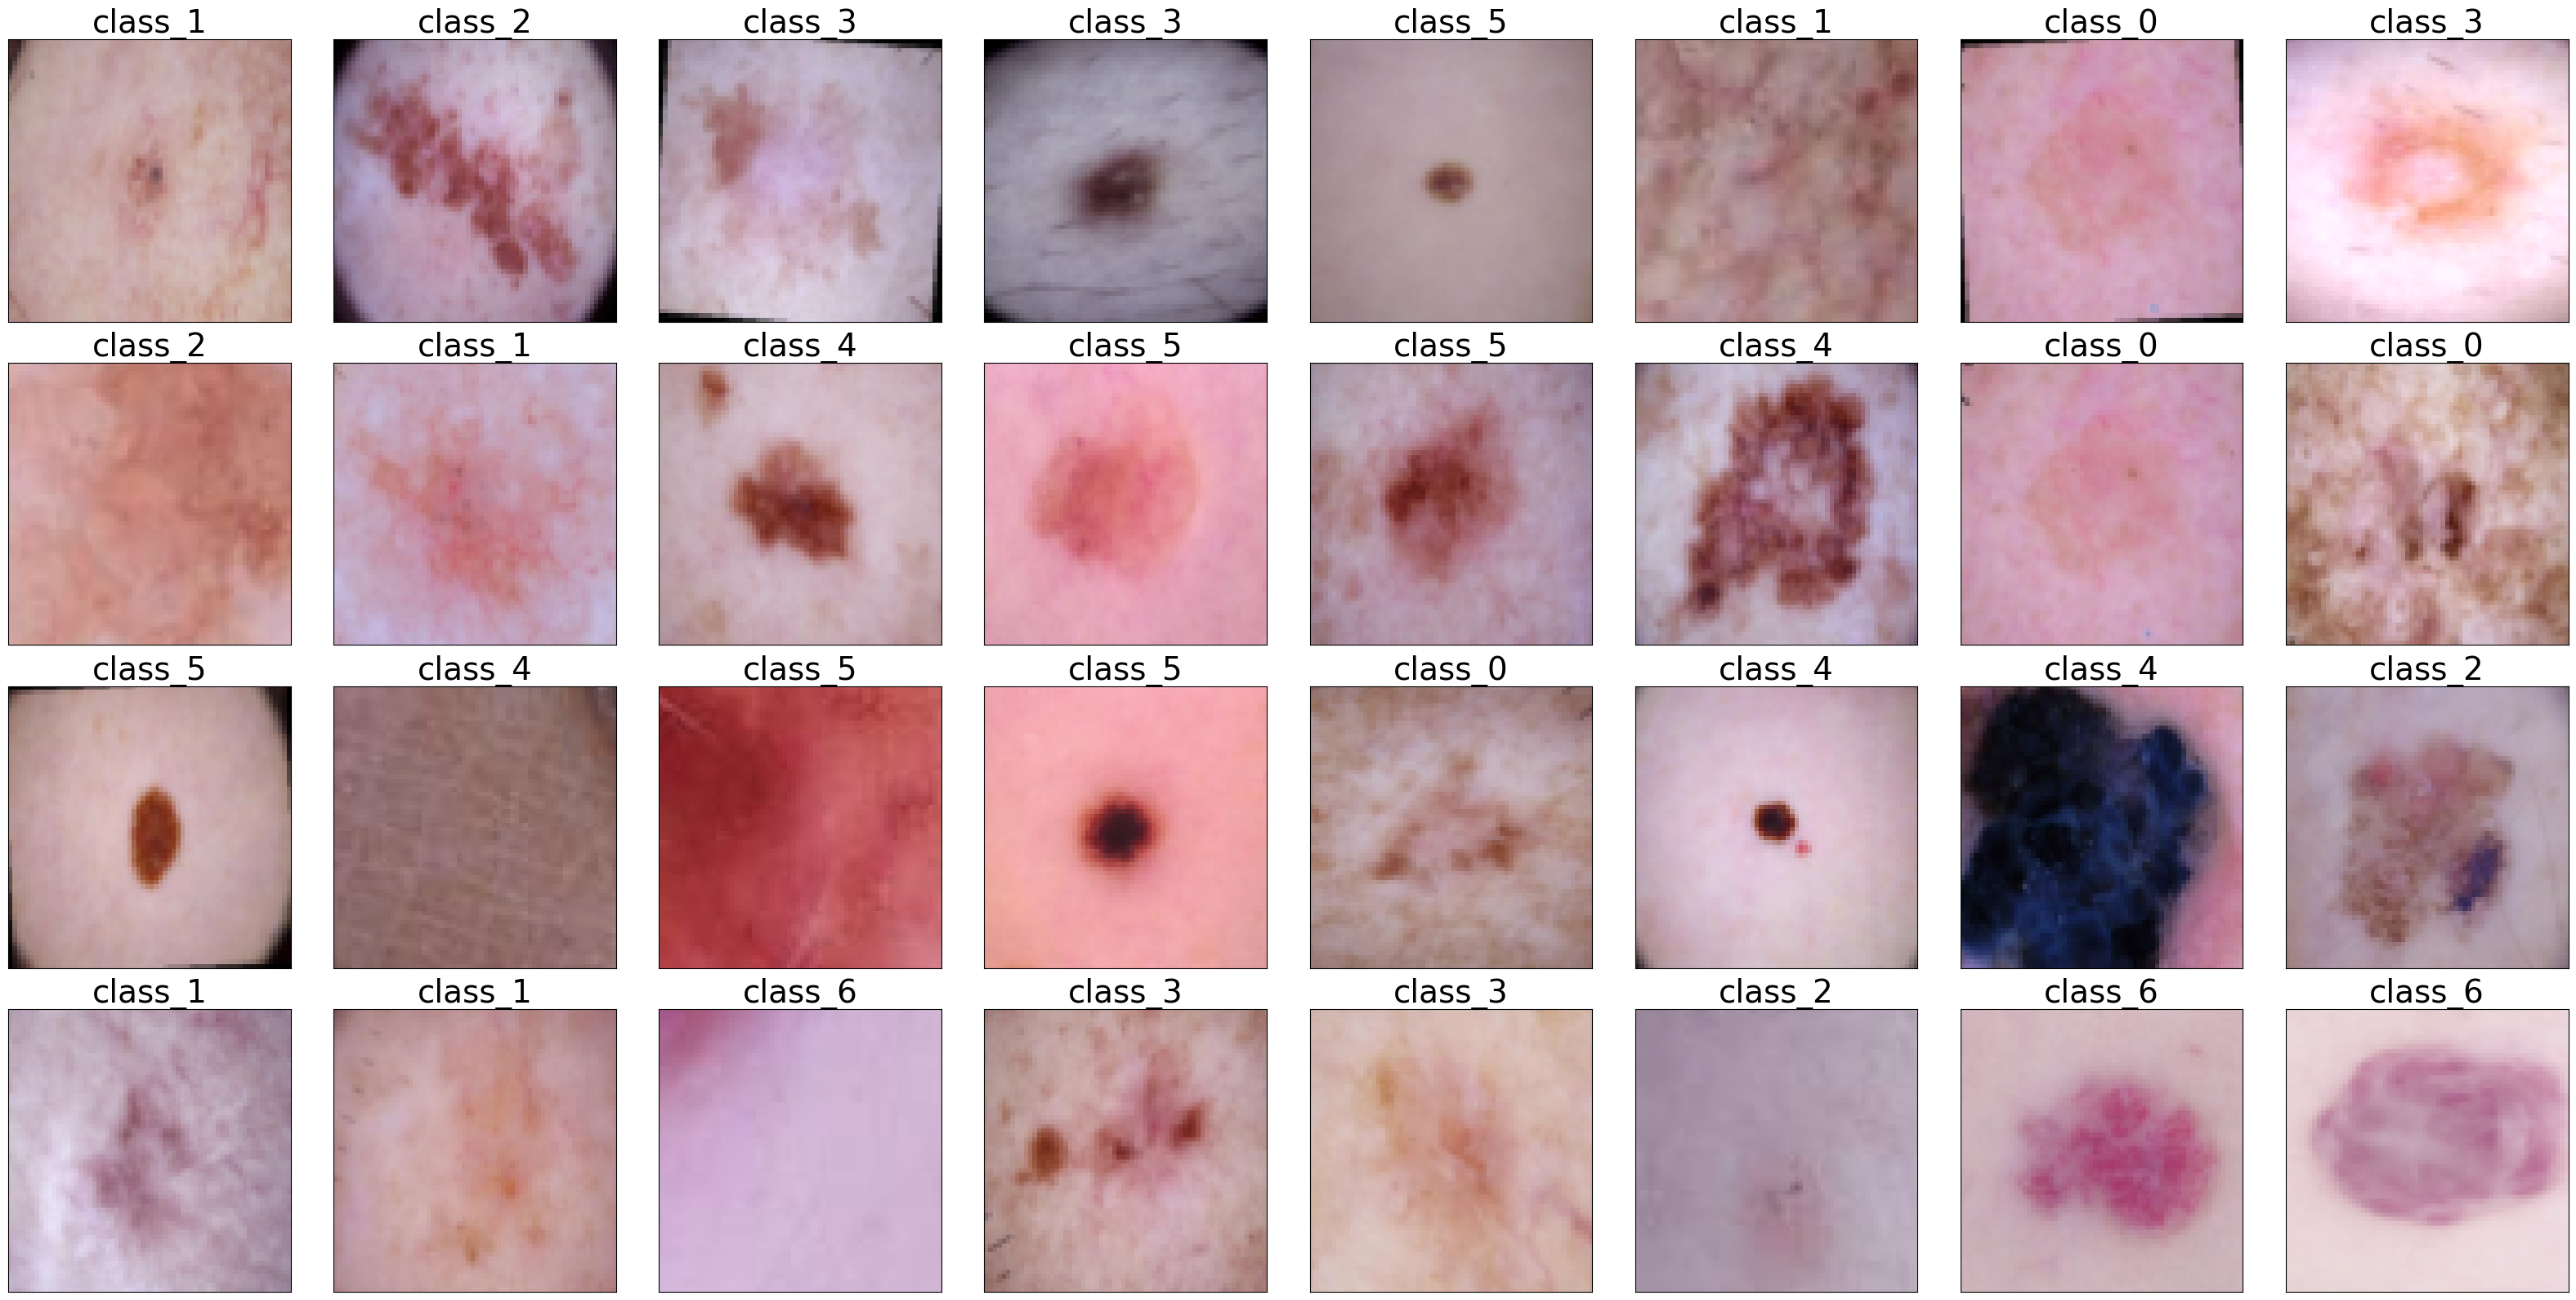

In [20]:
%%time

import itertools
import numpy as np
import os

nrows,ncols = rows_cols(batch_size)

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*4,nrows*4),
                       subplot_kw={'facecolor': "#ebf5ff"})
rb_index = np.random.randint(0, len(train_dataloader))

# Obtener el batch correspondiente al índice aleatorio
imgs, labels = next(itertools.islice(train_dataloader, rb_index, rb_index+1))
print(type(imgs),imgs.shape)

for i, ax in enumerate(ax.flatten()):
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(classes[labels[i]], fontsize=28)
  #ax.imshow(imgs[i].permute(1,2,0)) # for unnormalized
  ax.imshow(inv_normalize(imgs[i]).permute(1,2,0)) # for unnormalized

fig.tight_layout()

## 4. **Define a [Convolutional Neural Network](https://pytorch.org/docs/stable/nn.html)**



---
**import Libraries**

---


In [21]:
import torch.nn as nn
import torch.nn.functional as F

---
**Define the Model**

---

To enhance previous CNN model, we can make several adjustments:

1. **``Dropout Layers``**: Add dropout layers to reduce overfitting.
2. **``Residual Connections``**: Adding residual connections can improve the learning capability of deep networks.
3. **``Global Average Pooling``**: Replace the `Flatten` layer with a global average pooling layer to reduce the number of parameters and prevent overfitting.
4. **``Learning Rate Scheduler``**: Implement a scheduler to dynamically adjust the learning rate during training.
5. **``Weight Initialization``**: Properly initialize the weights to improve convergence.
6. **``Data Augmentation``**: While not part of the model architecture, performing data augmentation during training can improve performance.




In [22]:

import torch.nn as nn

class myCNN(nn.Module):
    def __init__(self):
        super().__init__()

        # Define the convolutional part of the network using nn.Sequential
        self.network = nn.Sequential(
            # Layer 1: Conv2d -> BatchNorm -> ReLU
            # Input: 3 channels (RGB image), Output: 32 feature maps, kernel size 3x3, padding 1 for same size output
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            # Layer 2: Conv2d -> BatchNorm -> ReLU
            # Input: 32 feature maps, Output: 64 feature maps, stride 1, padding 1
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            # Layer 3: MaxPool2d
            # Reduces spatial dimensions by 2 (i.e., height and width are halved)
            nn.MaxPool2d(2, 2),

            # Layer 4: Conv2d -> BatchNorm -> ReLU
            # Input: 64 feature maps, Output: 128 feature maps
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            # Layer 5: Conv2d -> BatchNorm -> ReLU
            # Second 128-channel convolutional layer for deeper feature extraction
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            # Layer 6: MaxPool2d
            # Further reduces spatial dimensions by half
            nn.MaxPool2d(2, 2),

            # Layer 7: Conv2d -> BatchNorm -> ReLU
            # Input: 128 feature maps, Output: 256 feature maps
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            # Layer 8: Conv2d -> BatchNorm -> ReLU
            # Deeper feature extraction with another 256-channel layer
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            # Layer 9: MaxPool2d
            # Spatial downsampling, reducing dimensions before the final pooling
            nn.MaxPool2d(2, 2),

            # Layer 10: Global Average Pooling
            # Reduces each feature map to a single value, converting spatial size to 1x1
            nn.AdaptiveAvgPool2d((1, 1))
        )

        # Define the fully connected layers
        self.fc_layers = nn.Sequential(
            # Layer 11: Linear -> BatchNorm -> ReLU -> Dropout
            # First fully connected layer with 256 input features and 128 output
            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),  # Dropout to reduce overfitting

            # Layer 12: Linear -> BatchNorm -> ReLU -> Dropout
            # Second fully connected layer with 128 input and 64 output
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.5),

            # Layer 13: Linear
            # Final fully connected layer to output 7 classes (for a 7-class classification problem)
            nn.Linear(64, 7)
        )

    def forward(self, xb):
        # Pass input through the convolutional layers
        xb = self.network(xb)

        # Flatten the tensor for input to the fully connected layers
        xb = xb.view(xb.size(0), -1)

        # Pass through the fully connected layers
        xb = self.fc_layers(xb)

        return xb

# Weight initialization function
def weights_init(m):
    """
    Custom weight initialization function.
    Applies Kaiming He initialization to Conv2d and Linear layers for better convergence.
    """
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
        # Kaiming He initialization (good for ReLU activations)
        nn.init.kaiming_normal_(m.weight, nonlinearity='relu')

        # Initialize biases to zero if they exist
        if m.bias is not None:
            nn.init.constant_(m.bias, 0)





**`Explanation of Changes`**:

1. **`Dropout`**: Added `nn.Dropout` after the linear layers to reduce overfitting.
2. **`Global Average Pooling`**: Replaced `nn.Flatten` with `nn.AdaptiveAvgPool2d` to reduce dimensionality without explicitly flattening.
3. **`Weight Initialization`**: Added a weight initialization function that uses Kaiming initialization to improve convergence.
4. **`Residual Connections`**: Not included in this version but can be considered for a more advanced version.

These changes can improve the model's generalization capability and efficiency.

### Setting the Computing Device




>**NOTE:** Outside of Google Colab, it is necessary to explicitly specify the device (GPU or CPU) and manage model parallelization if using multiple GPUs. This is crucial to ensure the model runs on the intended GPU and leverages the available hardware effectively. While Google Colab manages GPU allocation automatically, specifying the device ("cuda") and using `nn.DataParallel` can still be beneficial for explicit control and utilization of available resources, especially if you have specific requirements or want to ensure optimal performance. However, for many basic use cases, simply  letting Colab manage the resources with automatic GPU selection) will suffice.



---
**Setting CUDA environment**

---


In [23]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


model = myCNN().to(device)
model.apply(weights_init)
if torch.cuda.device_count() > 1:
  print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
  model = nn.DataParallel(model)

print(model)

Using cuda device
myCNN(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=



---
**Display the summary of our model**

---

In [24]:
%pip install torchsummary -q

from torchsummary import summary

summary(model, (3,64,64)) # input = [3,64,64]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             896
       BatchNorm2d-2           [-1, 32, 64, 64]              64
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
       BatchNorm2d-5           [-1, 64, 64, 64]             128
              ReLU-6           [-1, 64, 64, 64]               0
         MaxPool2d-7           [-1, 64, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]          73,856
       BatchNorm2d-9          [-1, 128, 32, 32]             256
             ReLU-10          [-1, 128, 32, 32]               0
           Conv2d-11          [-1, 128, 32, 32]         147,584
      BatchNorm2d-12          [-1, 128, 32, 32]             256
             ReLU-13          [-1, 128, 32, 32]               0
        MaxPool2d-14          [-1, 128,

### Define a Loss function and optimizer




---

**Define a Loss Function and a Optimizer**

---


In [25]:
criterion = nn.CrossEntropyLoss()
#criterion = nn.BCELoss()
#criterion = nn.BCEWithLogitsLoss()
# Define your optimizer
optimizer = torch.optim.SGD(model.parameters(),
                            lr=0.001,
                            momentum=0.9,
                            weight_decay=0.001)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## 5. **Train the network**

### Defining Training Loop

---
**Defining train**

---

In [26]:
def train(dataloader, model, criterion, optimizer):
  running_loss, corrects, current = 0, 0, 0
  size = len(dataloader.dataset) # number images from dataset
  print(f"Training:")
  model.train() #training mode on
  loop = tqdm(train_dataloader) # Initialize a progress bar
  for batch, (X, y) in enumerate(loop):
    # take data (X) and label (y) from a batch
    X, y = X.to(device), y.to(device) # Move the data and labels
                                      # to the device (CPU or GPU)

    # forward pass
    preds = model(X) # Compute predictions
    loss = criterion(preds, y) # Compute the loss between predictions and labels

    # backpropagation
    optimizer.zero_grad()   # zero the gradient buffers
    loss.backward()         # compute gradients to backwards
    optimizer.step()        # Does the "update weights" of model

    # Calculate Output Metrics training_loss, training_accuracy

    # 1. loss.item() contains the loss of entire mini-batch converted to scalar
    running_loss += loss.item() # Accumulate the loss for this batch

    # 2. current image (last image in the batch) for progressive bar
    current += len(X) # Update the current number of processed images

    # 3. From the predictions, I select the index (class) of the one with
    # the highest value and compare it with the label (class). The boolean value
    # is converted into a float (true becomes 1, false becomes 0), and all are
    # summed up. Finally, 'item' converts them into a scalar value.
    # This way, 'corrects' reflects the number of correct predictions (accuracy)
    corrects += (preds.argmax(1) == y).type(torch.float).sum().item()

    # 4. running loss is the sum of our loss. Training loss is a running average
    # through batches
    training_loss = running_loss/(batch+1)

    # 5. Training accuracy = number of corrects predictions/number of processed images
    training_accuracy = corrects/current

    # Update the progress bar with current epoch, batch, and metrics
    loop.set_description(f'[{epoch + 1}/{epochs} epochs, {current:>5d}/{len(train_dataloader.dataset):>5d} data]')
    loop.set_postfix(Training_Loss=training_loss, Accuracy=f'{100*corrects/current:>0.1f}%')

  return training_loss, training_accuracy

---
**Defining val**

---

In [27]:
def val(dataloader, model, criterion):
  size = len(dataloader.dataset) # number images from dataset to evaluate
  num_batches = len(dataloader)  # number of batches

  # Evaluation (test)) Mode
  model.eval()

  val_loss, corrects = 0, 0
  with torch.no_grad():
    for X, y in dataloader:
      X, y = X.to(device), y.to(device)

      # prediction for a dataset not used in training
      # compute prediction error and number of corrects
      # through batches
      preds = model(X)
      val_loss += criterion(preds, y).item()
      corrects += (preds.argmax(1) == y).type(torch.float).sum().item()
  val_loss /= num_batches
  corrects /= size
  print(f"Val: \n Accuracy: {(100*corrects):>0.1f}%, val_Loss: {val_loss:>8f} \n")

  return val_loss, corrects


---
**Create Train directories**

---

To create directories named `train1`, `train2`, etc., each time you execute a training loop, you can modify the code to check the number of existing training directories and then create the next directory in sequence. Here's an example of how you could do this:


In [28]:
import os
import torchvision.models as models

def create_train_dir():
  """
  Creates a directory named train within the current directory.
  """
  # Current directory
  current_dir = os.getcwd()
  print(current_dir)

  # Base path to the "train" directory
  base_train_dir = os.path.join(current_dir, 'train')

  # Determine the next training directory name
  train_dirs = [d for d in os.listdir(current_dir) if d.startswith('train') and d[5:].isdigit()]
  train_dirs.sort(key=lambda x: int(x[5:]) if x[5:].isdigit() else -1)
  next_train_num = 1 if not train_dirs else int(train_dirs[-1][5:]) + 1
  train_dir = os.path.join(current_dir, f'train{next_train_num}')

  # Create the next training directory
  os.makedirs(train_dir, exist_ok=True)
  print(f"Training directory: {train_dir}")
  return train_dir

---
**Define checkpoint and resume function**

---

In [29]:
import torch

def checkpoint(model, filename):
    torch.save({
    'optimizer': optimizer.state_dict(),
    'model': model.state_dict(),
    }, filename)
    with open(f'{filename}.csv', 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
      writer.writerow(['Epoch', 'Train Loss', 'Train Accuracy',
                       'Val Loss', 'Val Accuracy'])
      for epoch, (train_loss, train_accuracy, val_loss, val_accuracy) in enumerate(zip(loss_train_history, accuracy_train_history,
                  loss_val_history, accuracy_val_history)):
        writer.writerow([epoch+1, train_loss, train_accuracy,
                     val_loss, val_accuracy])

def resume(model, filename):
    model.load_state_dict(torch.load(filename)['model'])
    optimizer.load_state_dict(torch.load(filename)['optimizer'])



 ---
 **Best Model and Early Stopping**

 ---


In [30]:
%%time

from tqdm import tqdm # progress bar
import csv

early_stop_thresh = 7
best_accuracy = -1
best_epoch = -1


loss_train_history = []
accuracy_train_history = []
loss_val_history = []
accuracy_val_history = []

#create directory for training metrics store
os.chdir(HOME)
train_dir = create_train_dir()


for epoch in range(epochs):
  loss_train,acc_train = train(train_dataloader, model, criterion, optimizer)
  loss_train_history.append(loss_train)
  accuracy_train_history.append(acc_train)
  loss_val,acc_val= val(val_dataloader, model, criterion)
  loss_val_history.append(loss_val)
  accuracy_val_history.append(acc_val)
  if acc_val > best_accuracy:
    best_accuracy = acc_val
    best_epoch = epoch+1
    checkpoint(model, os.path.join(train_dir,"best_model.pth"))
    print(f'best model in epoch={epoch+1} with Accuracy={(100*acc_val):>0.1f}%')
  elif epoch - best_epoch >= early_stop_thresh:
    print(f"Early stopped training at epoch {epoch+1} due to {early_stop_thresh} epochs whitout enhacement")
    break  # terminate the training loop
print("Done!. Finished Training")

/content
Training directory: /content/train1
Training:


[1/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:39<00:00, 10.11it/s, Accuracy=36.6%, Training_Loss=1.69]


Val: 
 Accuracy: 52.0%, val_Loss: 1.248693 

best model in epoch=1 with Accuracy=52.0%
Training:


[2/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:27<00:00, 10.91it/s, Accuracy=45.4%, Training_Loss=1.42]


Val: 
 Accuracy: 51.5%, val_Loss: 1.177205 

Training:


[3/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:13<00:00, 12.08it/s, Accuracy=48.9%, Training_Loss=1.34]


Val: 
 Accuracy: 61.4%, val_Loss: 1.140759 

best model in epoch=3 with Accuracy=61.4%
Training:


[4/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:11<00:00, 12.27it/s, Accuracy=51.8%, Training_Loss=1.28]


Val: 
 Accuracy: 65.2%, val_Loss: 1.022055 

best model in epoch=4 with Accuracy=65.2%
Training:


[5/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:11<00:00, 12.26it/s, Accuracy=54.5%, Training_Loss=1.21]


Val: 
 Accuracy: 66.0%, val_Loss: 0.963449 

best model in epoch=5 with Accuracy=66.0%
Training:


[6/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:11<00:00, 12.19it/s, Accuracy=56.8%, Training_Loss=1.16]


Val: 
 Accuracy: 63.2%, val_Loss: 0.966957 

Training:


[7/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:11<00:00, 12.22it/s, Accuracy=59.4%, Training_Loss=1.1]


Val: 
 Accuracy: 66.4%, val_Loss: 0.981234 

best model in epoch=7 with Accuracy=66.4%
Training:


[8/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:09<00:00, 12.40it/s, Accuracy=61.1%, Training_Loss=1.06]


Val: 
 Accuracy: 64.7%, val_Loss: 0.946273 

Training:


[9/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:10<00:00, 12.37it/s, Accuracy=62.4%, Training_Loss=1.02]


Val: 
 Accuracy: 65.9%, val_Loss: 0.899647 

Training:


[10/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:12<00:00, 12.17it/s, Accuracy=64.5%, Training_Loss=0.986]


Val: 
 Accuracy: 67.5%, val_Loss: 0.900906 

best model in epoch=10 with Accuracy=67.5%
Training:


[11/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:11<00:00, 12.26it/s, Accuracy=65.4%, Training_Loss=0.957]


Val: 
 Accuracy: 71.5%, val_Loss: 0.815212 

best model in epoch=11 with Accuracy=71.5%
Training:


[12/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:11<00:00, 12.26it/s, Accuracy=66.8%, Training_Loss=0.924]


Val: 
 Accuracy: 67.0%, val_Loss: 0.896414 

Training:


[13/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:11<00:00, 12.26it/s, Accuracy=68.0%, Training_Loss=0.894]


Val: 
 Accuracy: 66.4%, val_Loss: 0.927472 

Training:


[14/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:11<00:00, 12.24it/s, Accuracy=69.5%, Training_Loss=0.854]


Val: 
 Accuracy: 65.3%, val_Loss: 0.962637 

Training:


[15/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:10<00:00, 12.35it/s, Accuracy=70.5%, Training_Loss=0.833]


Val: 
 Accuracy: 63.4%, val_Loss: 1.095839 

Training:


[16/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:09<00:00, 12.43it/s, Accuracy=71.6%, Training_Loss=0.801]


Val: 
 Accuracy: 72.0%, val_Loss: 0.793790 

best model in epoch=16 with Accuracy=72.0%
Training:


[17/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:11<00:00, 12.26it/s, Accuracy=72.7%, Training_Loss=0.78]


Val: 
 Accuracy: 62.3%, val_Loss: 0.994432 

Training:


[18/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:12<00:00, 12.18it/s, Accuracy=73.9%, Training_Loss=0.748]


Val: 
 Accuracy: 69.9%, val_Loss: 0.901997 

Training:


[19/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:10<00:00, 12.33it/s, Accuracy=75.0%, Training_Loss=0.718]


Val: 
 Accuracy: 67.0%, val_Loss: 0.961780 

Training:


[20/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:10<00:00, 12.36it/s, Accuracy=75.8%, Training_Loss=0.7]


Val: 
 Accuracy: 69.6%, val_Loss: 0.934802 

Training:


[21/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:10<00:00, 12.35it/s, Accuracy=77.0%, Training_Loss=0.671]


Val: 
 Accuracy: 65.4%, val_Loss: 1.047124 

Training:


[22/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:10<00:00, 12.31it/s, Accuracy=77.4%, Training_Loss=0.648]


Val: 
 Accuracy: 63.0%, val_Loss: 1.162923 

Training:


[23/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:10<00:00, 12.28it/s, Accuracy=78.8%, Training_Loss=0.623]


Val: 
 Accuracy: 68.0%, val_Loss: 1.109329 

Training:


[24/30 epochs, 51450/51450 data]: 100%|██████████| 1608/1608 [02:09<00:00, 12.38it/s, Accuracy=79.7%, Training_Loss=0.595]


Val: 
 Accuracy: 64.5%, val_Loss: 1.121028 

Early stopped training at epoch 24 due to 7 epochs whitout enhacement
Done!. Finished Training
CPU times: user 15min 21s, sys: 1min, total: 16min 21s
Wall time: 53min 44s


---
**Displaying the metrics curves model**

---

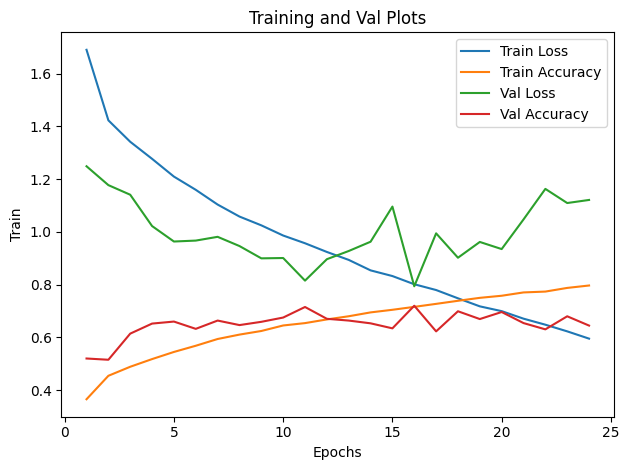

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_title('Training and Val Plots')
ax.plot(range(1,len(loss_train_history)+1), loss_train_history, label="Train Loss")
ax.plot(range(1,len(loss_train_history)+1), accuracy_train_history, label="Train Accuracy")
ax.plot(range(1,len(loss_train_history)+1), loss_val_history, label="Val Loss")
ax.plot(range(1,len(loss_train_history)+1), accuracy_val_history, label="Val Accuracy")
ax.set_xlabel("Epochs")
ax.set_ylabel("Train")
ax.legend()

fig.tight_layout()

## 6. **Validating our model**


---
**Validation Metrics**

---

In [32]:
import torch
import os
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import numpy as np

# Define a function to obtain the model predictions.
def obtener_predicciones(modelo, dataloader):
    preds = []
    etiquetas = []
    for batch in dataloader:
        inputs, etiquetas_batch = batch
        inputs = inputs.to(device)  # If you are using GPU, move the data to the GPU.
        outputs = modelo(inputs)
        _, predicciones = torch.max(outputs, 1)
        preds.extend(predicciones.tolist())
        etiquetas.extend(etiquetas_batch.tolist())
    return preds, etiquetas

# Defines the device (CPU or GPU) on which the operations are to be performed
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load saved model
model_file = os.path.join(train_dir, "best_model.pth")
checkpoint = torch.load(model_file, map_location=device)
model_state_dict = checkpoint['model']

# Suppose 'val_dataloader' is your validation DataLoader

# Define and load the model
# Make sure you define your model properly
model = myCNN()
model.load_state_dict(model_state_dict)
model.to(device)
model.eval()

# Get model predictions and true labels from the validation set.
predicciones_val, etiquetas_val = obtener_predicciones(model, val_dataloader)

# Calculate the confusion matrix
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Print the complete confusion matrix
print("Matriz de Confusión:")
print(cm)

# If you want to obtain metrics such as accuracy, sensitivity, etc. for multiple classes,
# you can calculate them in the following way:

# Calculate accuracy by class
precision_por_clase = cm.diagonal() / cm.sum(axis=0)
print("Precisión por clase:", precision_por_clase)

# Callback per case
recall_por_clase = cm.diagonal() / cm.sum(axis=1)
print("Recall por clase:", recall_por_clase)

# Calcular F1 score per case
f1_por_clase = 2 * (precision_por_clase * recall_por_clase) / (precision_por_clase + recall_por_clase)
print("F1-score por clase:", f1_por_clase)


<ipython-input-32-dfb7bc382306>:25: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_file, map_location=device)


Matriz de Confusión:
[[114   5  15   2  10   0   4]
 [ 28 100  17   1   0   0   4]
 [ 20   3 104   3  14   5   1]
 [ 25   6   0 117   1   1   0]
 [ 27   5  38   1  71   8   0]
 [  4   2  18   0  13 110   3]
 [  0  10   0   0   0   0 140]]
Precisión por clase: [0.52293578 0.76335878 0.54166667 0.94354839 0.65137615 0.88709677
 0.92105263]
Recall por clase: [0.76       0.66666667 0.69333333 0.78       0.47333333 0.73333333
 0.93333333]
F1-score por clase: [0.61956522 0.71174377 0.60818713 0.8540146  0.54826255 0.80291971
 0.92715232]


---
**Get confusion metrics**

---

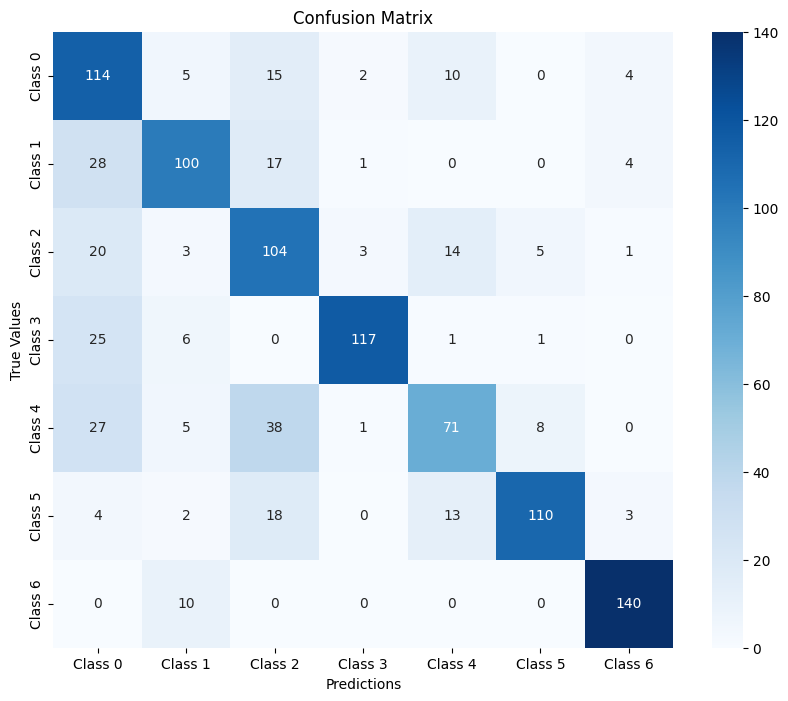

In [33]:
%pip install seaborn -q

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming 'etiquetas_val' are the true labels and 'predicciones_val' are the model predictions

# Calculate the confusion matrix
cm = confusion_matrix(etiquetas_val, predicciones_val)

# Define the labels for the confusion matrix
labels = [f'Class {i}' for i in range(len(cm))]

# Create a Pandas DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=labels, columns=labels)

# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.show()


---

**Display a multiple class ROC curve**

---


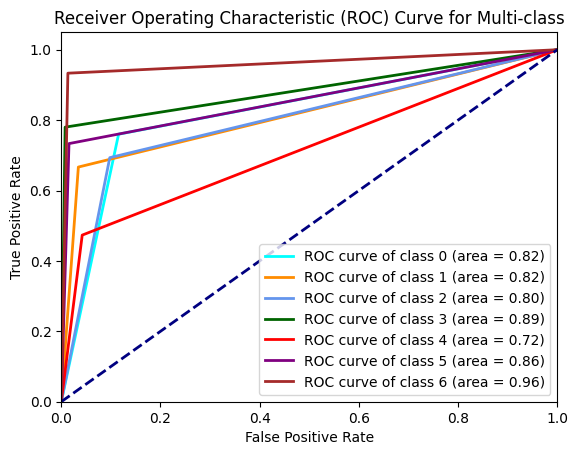

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Supongamos que 'predicciones_val' y 'etiquetas_val' son las predicciones y etiquetas verdaderas del conjunto de validación
# Obtenidas previamente usando la función obtener_predicciones()

# Número de clases
n_classes = len(set(etiquetas_val))

# Binarizar las etiquetas
etiquetas_val_binarized = label_binarize(etiquetas_val, classes=[i for i in range(n_classes)])
predicciones_val_binarized = label_binarize(predicciones_val, classes=[i for i in range(n_classes)])

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(etiquetas_val_binarized[:, i], predicciones_val_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar todas las curvas ROC
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'darkgreen', 'red', 'purple', 'brown']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()


## 7. **Predictions** (Inference)

---

**Testing**

---

For this multiclass classification test , we need change some things:


1. **Class Number Check**:
    - The code now checks if the confusion matrix is 2x2 to determine if it is a binary classification problem. If so, it extracts the values of TN, FP, FN, and TP. If not, it simply prints the entire confusion matrix.

2. **Confusion Matrix Visualization**:
    - It uses `seaborn.heatmap` to visualize the confusion matrix, which helps to better understand the model's performance.

3. **Classification Report**:
    - Prints a detailed classification report using `classification_report` from `sklearn`, providing additional metrics like precision, recall, and F1-score for each class.

These changes should help you better understand your model's results and ensure that the code handles different numbers of classes correctly.

<ipython-input-35-912f776d3a47>:51: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(f"{HOME}/train1/best_model.pth", map_location=device)


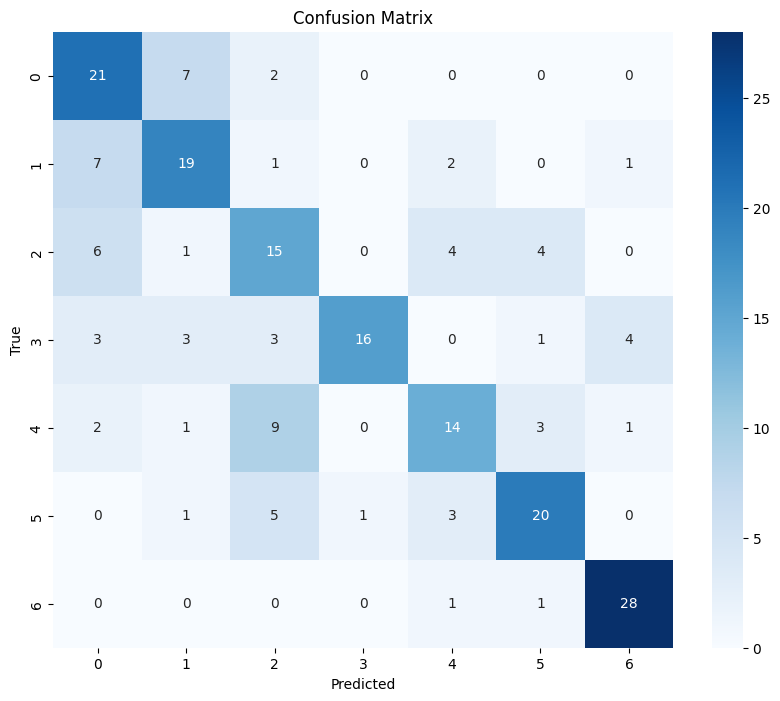

              precision    recall  f1-score   support

           0       0.54      0.70      0.61        30
           1       0.59      0.63      0.61        30
           2       0.43      0.50      0.46        30
           3       0.94      0.53      0.68        30
           4       0.58      0.47      0.52        30
           5       0.69      0.67      0.68        30
           6       0.82      0.93      0.88        30

    accuracy                           0.63       210
   macro avg       0.66      0.63      0.63       210
weighted avg       0.66      0.63      0.63       210

Confusion matrix shape: (7, 7), not a binary classification problem.


In [35]:
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the test directory
test_dir = f"{HOME}/datasets/test/"

# Define normalization parameters
mean = torch.tensor([0.7536, 0.5706, 0.6018])
std = torch.tensor([0.0849, 0.1106, 0.1187])
batch_size = 32

# Create the test dataset and dataloader
test_set = datasets.ImageFolder(test_dir, transform=transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
]))

test_dataloader = DataLoader(
    test_set,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)

# Define a function to get model predictions
def obtener_predicciones(modelo, dataloader):
    preds = []
    etiquetas = []
    with torch.no_grad():
        for batch in dataloader:
            inputs, etiquetas_batch = batch
            inputs = inputs.to(device)  # Move data to GPU if available
            outputs = modelo(inputs)
            _, predicciones = torch.max(outputs, 1)
            preds.extend(predicciones.tolist())
            etiquetas.extend(etiquetas_batch.tolist())
    return preds, etiquetas

# Define the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = myCNN()

# Load the model checkpoint
checkpoint = torch.load(f"{HOME}/train1/best_model.pth", map_location=device)
model.load_state_dict(checkpoint['model'])
model.to(device)
model.eval()

# Get model predictions and true labels from the test set
predicciones_test, etiquetas_test = obtener_predicciones(model, test_dataloader)

# Calculate the confusion matrix
cm = confusion_matrix(etiquetas_test, predicciones_test)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(etiquetas_test, predicciones_test))

# Check if binary classification
if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
    print("True Negatives (TN):", tn)
    print("False Positives (FP):", fp)
    print("False Negatives (FN):", fn)
    print("True Positives (TP):", tp)
else:
    print(f"Confusion matrix shape: {cm.shape}, not a binary classification problem.")


---

**Display a multiple ROC curve**

---


7


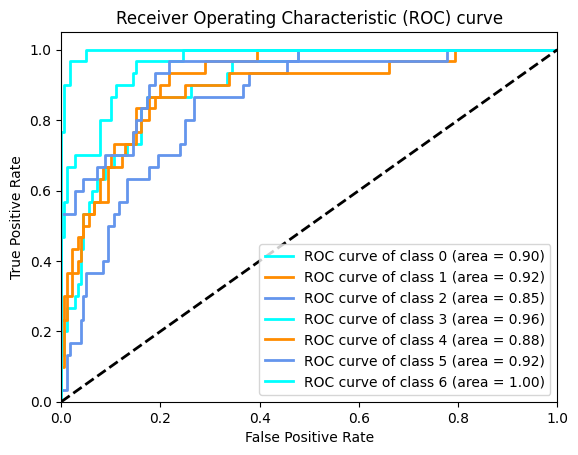

In [36]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Define a function to get model predictions
def obtener_predicciones(modelo, dataloader):
    preds = []
    etiquetas = []
    probas = []
    with torch.no_grad():
        for batch in dataloader:
            inputs, etiquetas_batch = batch
            inputs = inputs.to(device)  # Move data to GPU if available
            outputs = modelo(inputs)
            _, predicciones = torch.max(outputs, 1)
            preds.extend(predicciones.tolist())
            etiquetas.extend(etiquetas_batch.tolist())
            probas.extend(outputs.tolist())
    return preds, etiquetas, probas

# Get model predictions and true labels from the test set
predicciones_test, etiquetas_test, probas_test = obtener_predicciones(model, test_dataloader)

# Binarize the output
n_classes = len(test_set.classes)
print(n_classes)
etiquetas_test_binarized = label_binarize(etiquetas_test, classes=range(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(etiquetas_test_binarized[:, i], np.array(probas_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(etiquetas_test_binarized.ravel(), np.array(probas_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curves
plt.figure()
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

## `NoteBook Practice 9`

---
Modify the notebook as necessary to improve the performance parameters of a model you create. Try to use a metric that combines the partial metrics to show that your model classifies better than the baseline model shown in this notebook. What you can modify includes:

---

### Instructions in order to improve the Notebook (Use these suggestions as needed):

ChatGPT can be your great allied. Use it for your convenence.

1. **Model Architecture**: Modify the architecture of the model. Experiment with different layers, activation functions, or network structures.

2. **Training Parameters**: Tune the training parameters such as learning rate, batch size, number of epochs, and optimization algorithms (e.g., Adam, SGD).

3. **Regularization Techniques**: Apply regularization techniques like dropout, L1/L2 regularization to prevent overfitting. Investigate these options for yourself.

4. **Data augmentation**. Try different transformations and you don't forget concat the data augmentation. Remember the problems of google colab with T4 you don't abuse about it.

5. **Early stoping with best model**. Try differents parameter in order to stop the training loop.

Anyway, feel free to modify and adapt the exercise as needed to suit your learning objectives and preferences.

Happy coding!